In [1]:
pip install -Uqq fastbook

Note: you may need to restart the kernel to use updated packages.


In [2]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [3]:
from fastbook import *
from fastai.vision.widgets import *

In [4]:
key = os.environ.get('AZURE_SEARCH_KEY', 'f271870f34c045bf8abb7cbb26760e7c')

In [7]:
imagesPath = Path('images')
imagesPath.mkdir(exist_ok=True)

In [ ]:
# Download Bigglesworth images
bigglesworthPath = imagesPath/'bigglesworth'
bigglesworthPath.mkdir(exist_ok=True)
results = search_images_bing(key, 'mr bigglesworth')
download_images(bigglesworthPath, urls=results.attrgot('contentUrl'))

In [8]:
# Download the Gidget images
gidgetPath = imagesPath/'gidget'
gidgetPath.mkdir(exist_ok=True)
results = search_images_bing(key, 'taco bell chihuahua')
download_images(gidgetPath, urls=results.attrgot('contentUrl'))

In [10]:
fns = get_image_files(imagesPath)
fns

(#287) [Path('images/gidget/ee989430-93b5-4c6b-8e31-6a5c3da0e837.jpg'),Path('images/gidget/d61948d8-f018-4820-ae02-2c77fae1b7f9.jpg'),Path('images/gidget/f604986f-afd5-43e0-b3f7-3be551663059.jpg'),Path('images/gidget/27a855d1-22a8-4133-9563-da9c312dd491.jpg'),Path('images/gidget/fc3b376a-f16c-4237-8386-5a26d8ef55c3.jpg'),Path('images/gidget/8315665b-56f4-4506-ac22-e9d257b62af0.jpg'),Path('images/gidget/446ed27d-a96b-424d-822f-27fe8191a8d9.jpg'),Path('images/gidget/a6eaf4eb-d755-487c-a9f5-45a7b00f9a49.jpg'),Path('images/gidget/68d14d1d-9b62-442c-b767-fa51da6c4cf5.jpg'),Path('images/gidget/44f4c18c-3c5a-4238-9b7f-f5e247ceae96.jpg')...]

In [11]:
failed = verify_images(fns)
failed

(#13) [Path('images/gidget/928dc237-e6f1-4df8-a86d-3a188e6f6795.jpg'),Path('images/gidget/157aa689-6da1-4930-935d-b4dd79a75bf4.jpg'),Path('images/gidget/a465eb2d-7d9c-4f17-ac31-1ed9f318f202.jpg'),Path('images/gidget/24bec2c6-dd1f-4ed3-bfa9-a9c13a6fbe66.jpg'),Path('images/gidget/b42924e4-4e9b-4434-9dbf-1ba74f2aa9e7.jpg'),Path('images/gidget/5a23a260-b5c5-40db-b2cd-a6a42bba0a45.jpg'),Path('images/gidget/c4415426-e6d8-4554-a0e6-a8f9440b7d46.gif'),Path('images/bigglesworth/cee3a721-9a0e-481a-b807-7c00c70497d3.jpg'),Path('images/bigglesworth/7e38151a-ca06-4e6b-97d7-d8293a78ba83.jpg'),Path('images/bigglesworth/4c0a30ce-4220-4f90-8731-aff01cfc053f.jpg')...]

In [12]:
failed.map(Path.unlink)

(#13) [None,None,None,None,None,None,None,None,None,None...]

In [13]:
data_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [14]:
data_loaders = data_block.dataloaders(imagesPath)

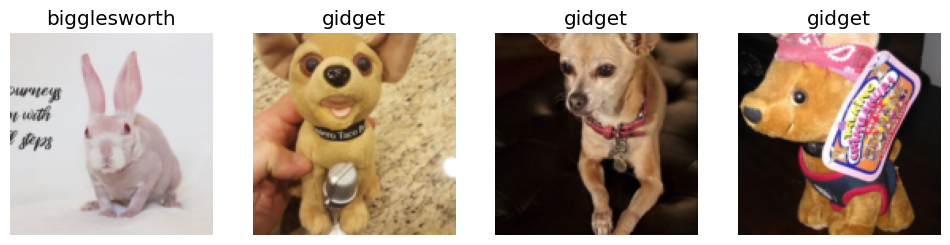

In [15]:
data_loaders.valid.show_batch(max_n=4, nrows=1)

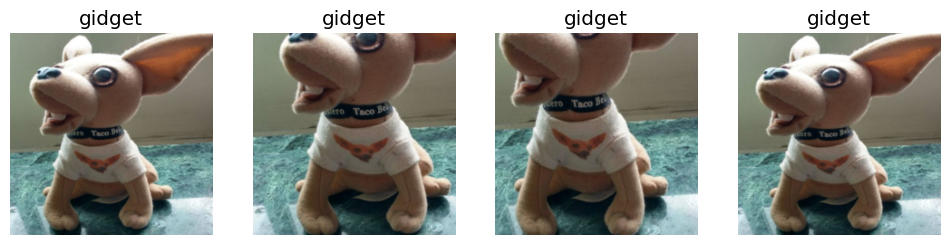

In [22]:
data_block = data_block.new(item_tfms=RandomResizedCrop(224, min_scale=0.5))
data_loaders = bears.dataloaders(imagesPath)
data_loaders.train.show_batch(max_n=4, nrows=1, unique=True)

In [23]:
learn = vision_learner(data_loaders, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/matthewsgarlata/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:04<00:00, 11.0MB/s]
[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


epoch,train_loss,valid_loss,error_rate,time
0,1.007769,0.240014,0.092593,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.449700,0.095246,0.037037,00:05
1,0.309829,0.027170,0.000000,00:03
2,0.219675,0.014395,0.000000,00:03
3,0.172251,0.013208,0.000000,00:03


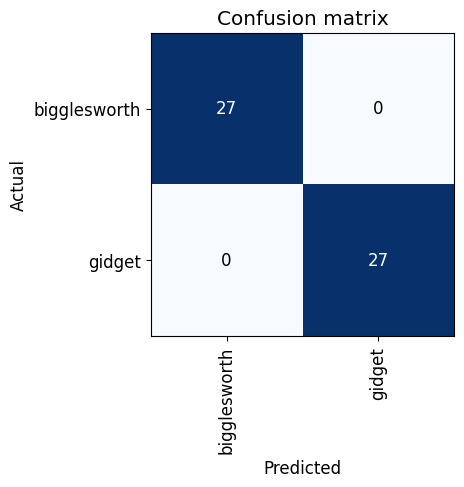

In [24]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

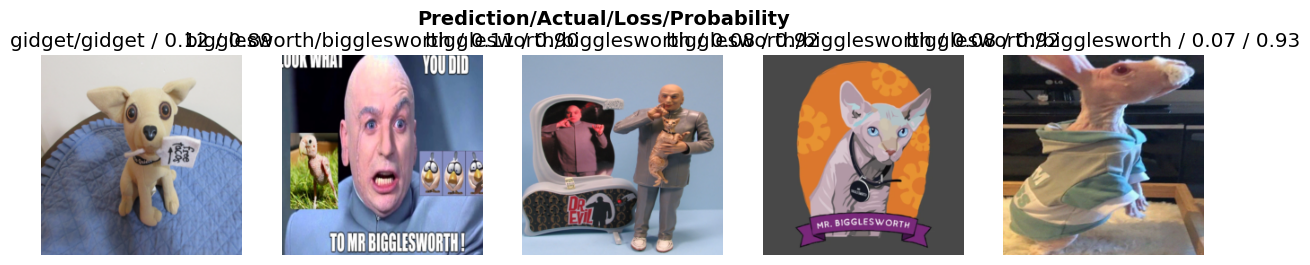

In [25]:
interp.plot_top_losses(5, nrows=1)